# 一元线性回归教程

* numpy - 矩阵计算
* scipy - 微积分之类的操作
* pandas - 基于numpy开发的数据处理库，python上的R语言
* matplotlib - 数据可视化
* scikit-learn - 机器学习库
* tensorflow/pytorch - 深度学习框架

### —— 用最小二乘法求解一元线性回归

In [5]:
# 从numpy导入所有
from numpy import *
import numpy
# 导入画图工具，as是别名的意思
import matplotlib.pyplot as plt

#### 1. 导入数据

我们用一组现成的数据，文件 data.csv

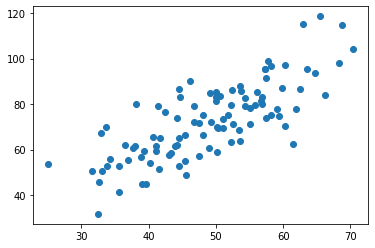

In [7]:
# 从data.csv文件中加载数据，以逗号为分隔符
points = numpy.genfromtxt('data.csv', delimiter=',')

# 提取 x，y
# 冒号的意思是所有数据,0表示第0列，1表示第1列
x = numpy.array(points[:,0])
y = numpy.array(points[:,1])

# 用plt做出散点图
plt.scatter(x,y)
plt.show()

In [8]:
arr = [1,2,3,4,5,6,7,8,9,10]
print(arr[-1])
print(arr[:])
print(arr[1:3])

10
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2, 3]


#### 2. 定义损失函数

In [11]:
# 定义线性模型 y = mx + b

def compute_cost(points, b, m):
    # 初始化总的损失值为0
    total_cost = 0
    # N为训练数据的数量
    N = len(points)
    
    # 计算所有误差平方的和 sum(y-mx-b)^2
    # N个训练数据，所以循环N次，[0,N)
    for i in range(N):
        # 第i行，第0列
        x = points[i, 0]
        # 第i行，第1列
        y = points[i, 1]
        
        # **为求平方
        total_cost += (y - m * x - b) ** 2
    
    return total_cost / float(N)

#### 3. 定义拟合算法函数

In [12]:
# 需要计算 x_avg
# 计算平均值的函数
def average(data):
    # sum是总和
    sum = 0
    # num是总数据量
    num = len(data)
    for i in range(num):
        sum += data[i]
    return sum / float(num)

# fit为拟合的意思
def fit(points):
    # N是训练数据的总数
    N = len(points)
    # x的平均值
    x_bar = average(array(points[:, 0]))
    
    sum_yx = 0
    sum_x2 = 0
    
    sum_b = 0
    
    # 求m
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        sum_yx += y * (x - x_bar)
        sum_x2 += x ** 2
        
    m = sum_yx / ( sum_x2 - x_bar ** 2 * float(N))
    
    # 求b
    for i in range(N):
        x = points[i, 0]
        y = points[i, 1]
        sum_b += y - m * x
        
    b = sum_b / float(N)
    
    return m, b

#### 4. 测试：运行fit函数来计算最优的m和b

In [14]:
m, b = fit(points)

print("m is:",m)
print("b is:",b)

# 计算损失函数
cost = compute_cost(points, b, m)

print("cost is:", cost)

m is: 1.3224310227553846
b is: 7.991020982269173
cost is: 110.25738346621313


#### 5. 画出拟合曲线

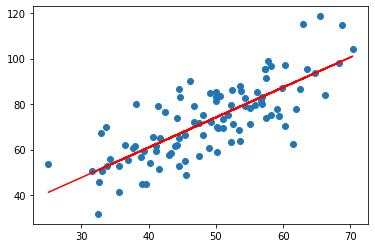

In [16]:
plt.scatter(x, y)

# 针对每一个x，求出预测值
y_pred = m * x + b

# r为red
plt.plot(x, y_pred, c='r')

plt.show()